### Image
Using BQ table, Object Table and Remote Functions
* Read from GCS
* Combine with structured data and display
* Blur in Python Remote Function
* Output write to GCS

In [1]:
import bigframes.pandas as bpd
from bigframes.ml import vision

### Read from wildcard GCS path

In [2]:
df = bpd.from_glob_path("gs://garrettwu_bucket/images/*")
df


/usr/local/google/home/garrettwu/src/bigframes/bigframes/session/__init__.py:2047: UserWarning: No explicit location is set, so using location US for the session.
  return Session(context)


uri
0      gs://garrettwu_bucket/images/images.jpeg
1  gs://garrettwu_bucket/images/images (1).jpeg
2    gs://garrettwu_bucket/images/download.jpeg

[3 rows x 1 columns]

### Or Read from an existing Object Table

In [ ]:
df = bpd.read_gbq_object_table("bigframes-dev.garrettwu.img_obj_table")
df

### Combine with structured data

In [3]:
df["number"] = [0, 1, 2]
df["author"] = ["Alice", "Bob", "Alice"]

In [4]:
df["version"] = df["uri"].blob.version()
df["content_type"] = df["uri"].blob.content_type()
df

/tmp/ipykernel_1678536/1080281581.py:1: UserWarning: Reading cached table from 2024-06-26 01:37:19.039148+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  df["version"] = df["uri"].blob.version()
/tmp/ipykernel_1678536/1080281581.py:2: UserWarning: Reading cached table from 2024-06-26 01:37:19.039148+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  df["content_type"] = df["uri"].blob.content_type()


uri  number author  \
0      gs://garrettwu_bucket/images/images.jpeg       0  Alice   
1  gs://garrettwu_bucket/images/images (1).jpeg       1    Bob   
2    gs://garrettwu_bucket/images/download.jpeg       2  Alice   

            version content_type  
0  1708566948182921   image/jpeg  
1  1708566948192241   image/jpeg  
2  1708566948168122   image/jpeg  

[3 rows x 5 columns]

### Display images

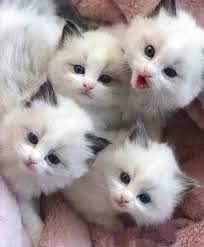

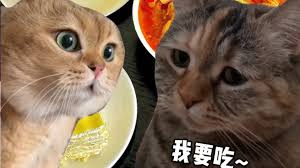

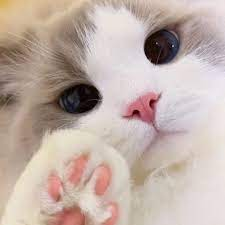

In [5]:
df["uri"].blob.display()

### Blur images

In [6]:
df["blurred"] = df["uri"].blob.img_blur((10, 10), "images_blurred", mode="remote")
df

uri  number author  \
0      gs://garrettwu_bucket/images/images.jpeg       0  Alice   
1  gs://garrettwu_bucket/images/images (1).jpeg       1    Bob   
2    gs://garrettwu_bucket/images/download.jpeg       2  Alice   

            version content_type  \
0  1708566948182921   image/jpeg   
1  1708566948192241   image/jpeg   
2  1708566948168122   image/jpeg   

                                             blurred  
0   gs://garrettwu_bucket/images_blurred/images.jpeg  
1  gs://garrettwu_bucket/images_blurred/images (1...  
2  gs://garrettwu_bucket/images_blurred/download....  

[3 rows x 6 columns]

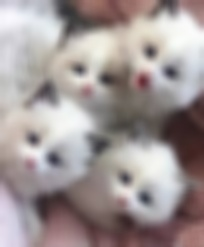

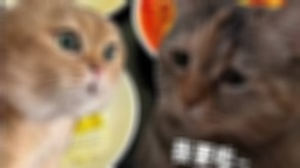

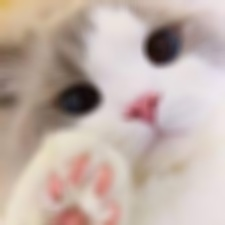

In [7]:
df["blurred"].blob.display()

### Vertex Multi-modal model (Local show case)

In [8]:
df = df[["uri"]]

In [9]:
df["question"] = ["what are the animals in the image?", "How many cats are there in the image?", "How does the cat feel?"]

In [10]:
multi_modal = vision.GeminiMultimodalTextGenerator()
result_mm = multi_modal.predict(df)
result_mm

uri  \
0      gs://garrettwu_bucket/images/images.jpeg   
1  gs://garrettwu_bucket/images/images (1).jpeg   
2    gs://garrettwu_bucket/images/download.jpeg   

                                question  \
0     what are the animals in the image?   
1  How many cats are there in the image?   
2                 How does the cat feel?   

                                   multimodal_result  
0   The animals in the image are kittens. They ar...  
1                     There are 2 cats in the image.  
2   The cat is feeling playful and wants to inter...  

[3 rows x 3 columns]

In [11]:
result_mm["multimodal_result"][2]

' The cat is feeling playful and wants to interact with the person taking the picture.'